In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
station_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["temp_o"].describe()

                     Unnamed: 0.1      temp_o  tempd_o    rh_o  dir_o  \
time                                                                    
2018-09-08 03:30:00        187900  291.150001   288.15   82.62  240.0   
2018-09-08 04:00:00        187901  291.150001   288.15   82.62  230.0   
2018-09-08 04:30:00        187902  291.150001   288.15   82.62  220.0   
2018-09-08 05:00:00        187903  290.149999   288.15   88.00  230.0   
2018-09-08 05:30:00        187904  290.149999   288.15   88.00  200.0   
...                           ...         ...      ...     ...    ...   
2020-12-24 21:30:00        229245  278.150000   278.15  100.00   50.0   
2020-12-24 22:00:00        229246  278.150000   277.15   93.24   60.0   
2020-12-24 22:30:00        229247  278.150000   277.15   93.24   80.0   
2020-12-24 23:00:00        229248  278.150000   277.15   93.24   30.0   
2020-12-24 23:30:00        229249  278.150000   277.15   93.24   40.0   

                        spd_o wind_gust_o  mslp_o 

count    41305.000000
mean       287.467008
std          5.499157
min        273.150000
25%        283.150000
50%        287.150000
75%        291.150001
max        310.149999
Name: temp_o, dtype: float64

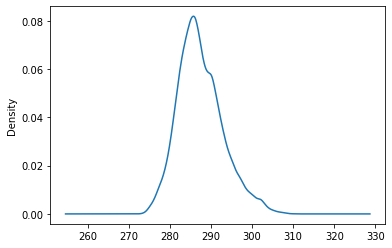

In [6]:
station = station_all[["temp_o","dir_o"]]
station.temp_o.plot(kind ="kde");

In [8]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-243,271),(271, 273),(273,275),(275,277),
                                       (277,279),(279,281),(281,283),(283,285),
                                       (285,287),(287,289),(289,291),(291,293),
                                       (293,295),(295,297),(297,299),(299,301),
                                       (301,303),(303,305),(305,307),(307,309),
                                       (309,311),(311,313),(313,315),(315,317),
                                       (317,319),(319,321),(321,333)])
        
labels = ["(-30,-2]","(-2,0]","(0,2]","(2,4]","(4,6]","(6,8]","(8,10]","(10,12]",
        "(12,14]","(14,16]","(16,18]","(18,20]","(20,22]","(22,24]","(24,26]",
        "(26,28]", "(28,30]","(30,32]","(32,34]","(34,36]","(36,38]","(38,40]",
        "(40,42]","(42,44]","(44,46]","(46,60]"]

station["temp_l"] = pd.cut(station["temp_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

station = station.drop(columns=["dir_o"])

station.sample(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,temp_o,temp_l
time,,
2018-10-06 03:30:00,284.150000,"(10,12]"
2020-07-27 15:00:00,297.149998,"(24,26]"
2019-08-31 18:00:00,295.149999,"(22,24]"
2020-05-27 23:00:00,296.150001,"(22,24]"
2019-06-19 00:00:00,288.150000,"(14,16]"
2019-08-25 14:30:00,297.149998,"(24,26]"
2020-05-07 12:00:00,296.150001,"(22,24]"
2019-04-11 22:00:00,283.150000,"(10,12]"
2019-07-25 15:00:00,293.150000,"(20,22]"


**Forecast D0**

In [9]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")
model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [10]:
#label meteorological model prec points 0 to 9
model1k["temp0_l"] = pd.cut(model1k["temp0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["temp1_l"] = pd.cut(model1k["temp1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)



In [11]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["temp_o"])
df_all1k[["temp_l","temp0_l","temp1_l"]].sample(20)

,temp_l,temp0_l,temp1_l
time,,,
2019-11-06 07:00:00,"(10,12]","(8,10]","(8,10]"
2019-09-28 06:00:00,"(10,12]","(8,10]","(8,10]"
2019-09-14 01:00:00,"(24,26]","(16,18]","(16,18]"
2019-11-02 05:00:00,"(14,16]","(14,16]","(12,14]"
2020-10-26 07:00:00,"(6,8]","(8,10]","(6,8]"
2019-04-30 09:00:00,"(12,14]","(14,16]","(14,16]"
2020-05-26 20:00:00,"(24,26]","(22,24]","(22,24]"
2020-12-07 21:00:00,"(8,10]","(8,10]","(8,10]"
2019-07-30 10:00:00,"(18,20]","(16,18]","(16,18]"


In [12]:
print("station\n",df_all1k["temp_l"].value_counts(normalize=True))
print("point 0\n",df_all1k["temp0_l"].value_counts(normalize=True))
print("point 1\n",df_all1k["temp1_l"].value_counts(normalize=True))



station
 (12,14]    0.158884
(14,16]    0.140460
(10,12]    0.131157
(16,18]    0.121975
(18,20]    0.093093
(8,10]     0.092545
(20,22]    0.063420
(6,8]      0.049556
(22,24]    0.041591
(24,26]    0.027423
(4,6]      0.025660
(26,28]    0.018850
(28,30]    0.013316
(2,4]      0.010094
(30,32]    0.006810
(32,34]    0.003162
(34,36]    0.001155
(0,2]      0.000730
(36,38]    0.000122
Name: temp_l, dtype: float64
point 0
 (10,12]    0.163687
(12,14]    0.161012
(14,16]    0.139244
(8,10]     0.137176
(16,18]    0.097410
(6,8]      0.077162
(18,20]    0.063663
(20,22]    0.047246
(22,24]    0.032470
(4,6]      0.027849
(24,26]    0.023045
(26,28]    0.015505
(28,30]    0.007965
(30,32]    0.003283
(2,4]      0.002189
(32,34]    0.001094
Name: temp0_l, dtype: float64
point 1
 (10,12]    0.159188
(12,14]    0.156999
(14,16]    0.136933
(8,10]     0.134197
(16,18]    0.095099
(6,8]      0.085127
(18,20]    0.062872
(20,22]    0.045786
(4,6]      0.036665
(22,24]    0.031011
(24,26]    0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



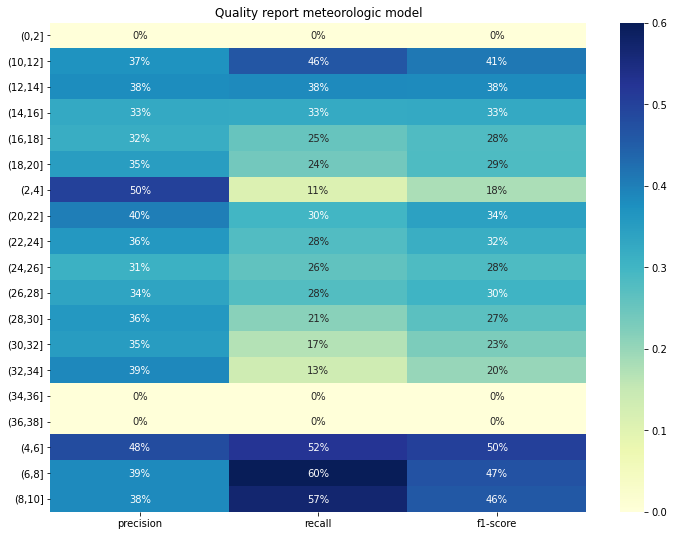

In [13]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
cr=pd.DataFrame(classification_report(df_all1k.temp_l, df_all1k.temp0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


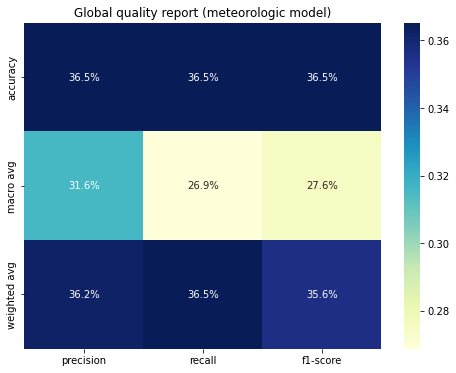

In [14]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

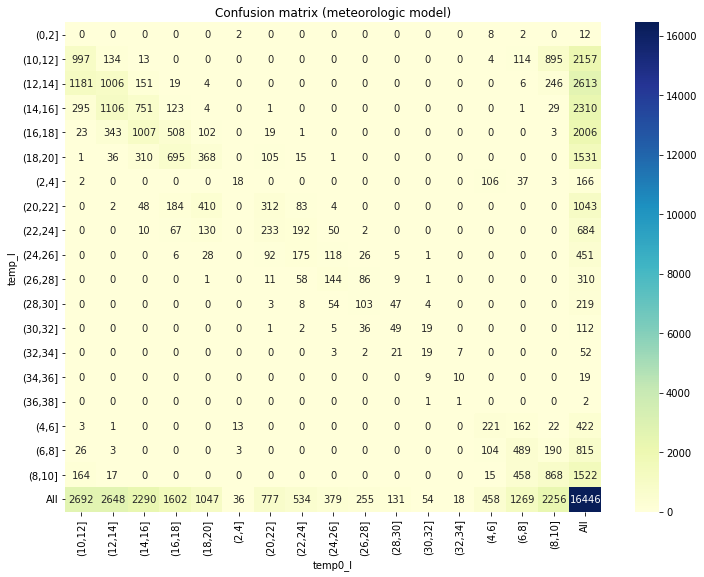

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")

global_sc = pd.crosstab(df_all1k.temp_l, df_all1k.temp0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

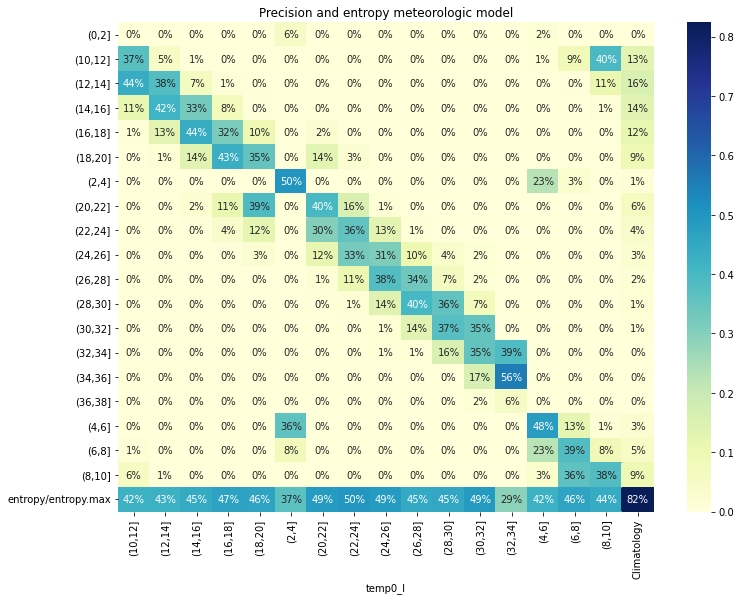

In [16]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc = pd.crosstab(df_all1k.temp_l, df_all1k.temp0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [17]:
model1k.drop(columns=["Unnamed: 0","temp0_l","temp1_l"])

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,6.723936,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,6.389383,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,6.182112,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,6.556708,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,7.131637,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,28.912556,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,21.361237,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,13.615123,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
(0,2]          0.000000  0.000000  0.000000     2.000000
(10,12]        0.555195  0.524540  0.539432   326.000000
(12,14]        0.506266  0.543011  0.523995   372.000000
(14,16]        0.517241  0.486726  0.501520   339.000000
(16,18]        0.490506  0.527211  0.508197   294.000000
(18,20]        0.480519  0.453061  0.466387   245.000000
(2,4]          0.535714  0.535714  0.535714    28.000000
(20,22]        0.400000  0.385965  0.392857   171.000000
(22,24]        0.372881  0.400000  0.385965   110.000000
(24,26]        0.323944  0.370968  0.345865    62.000000
(26,28]        0.528302  0.444444  0.482759    63.000000
(28,30]        0.457143  0.410256  0.432432    39.000000
(30,32]        0.307692  0.470588  0.372093    17.000000
(32,34]        0.333333  0.083333  0.133333    12.000000
(34,36]        0.428571  0.600000  0.500000     5.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
(0,2]          0.500000  1.000000  0.666667     1.000000
(10,12]        0.498339  0.517241  0.507614   290.000000
(12,14]        0.579208  0.555819  0.567273   421.000000
(14,16]        0.539683  0.541114  0.540397   377.000000
(16,18]        0.511551  0.527211  0.519263   294.000000
(18,20]        0.511521  0.504545  0.508009   220.000000
(2,4]          0.615385  0.761905  0.680851    21.000000
(20,22]        0.440252  0.479452  0.459016   146.000000
(22,24]        0.404762  0.365591  0.384181    93.000000
(24,26]        0.385714  0.402985  0.394161    67.000000
(26,28]        0.365854  0.326087  0.344828    46.000000
(28,30]        0.418605  0.461538  0.439024    39.000000
(30,32]        0.384615  0.357143  0.370370    14.000000
(32,34]        0.000000  0.000000  0.000000     6.000000
(34,36]        0.666667  0.800000  0.727273     5.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(0,2]          0.000000  0.000000  0.000000     3.00000
(10,12]        0.490683  0.539249  0.513821   293.00000
(12,14]        0.586207  0.584656  0.585430   378.00000
(14,16]        0.560694  0.544944  0.552707   356.00000
(16,18]        0.551601  0.508197  0.529010   305.00000
(18,20]        0.432773  0.483568  0.456763   213.00000
(2,4]          0.413793  0.571429  0.480000    21.00000
(20,22]        0.437126  0.442424  0.439759   165.00000
(22,24]        0.342857  0.356436  0.349515   101.00000
(24,26]        0.500000  0.358025  0.417266    81.00000
(26,28]        0.490566  0.509804  0.500000    51.00000
(28,30]        0.447368  0.566667  0.500000    30.00000
(30,32]        0.400000  0.235294  0.296296    17.00000
(32,34]        0.214286  0.500000  0.300000     6.00000
(34,36]        0.000000  0.000000  0.000000     4.00000
(36,38]   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 


Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
(0,2]          0.000000  0.000000  0.000000     2.000000
(10,12]        0.506410  0.509677  0.508039   310.000000
(12,14]        0.553922  0.560794  0.557337   403.000000
(14,16]        0.548193  0.501377  0.523741   363.000000
(16,18]        0.477816  0.510949  0.493827   274.000000
(18,20]        0.500000  0.482906  0.491304   234.000000
(2,4]          0.590909  0.393939  0.472727    33.000000
(20,22]        0.439759  0.474026  0.456250   154.000000
(22,24]        0.467213  0.495652  0.481013   115.000000
(24,26]        0.476190  0.416667  0.444444    72.000000
(26,28]        0.405405  0.348837  0.375000    43.000000
(28,30]        0.411765  0.466667  0.437500    30.000000
(30,32]        0.250000  0.272727  0.260870    11.000000
(32,34]        0.300000  0.428571  0.352941     7.000000
(34,36]        0.000000  0.000000  0.000000     4.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
(0,2]          0.000000  0.000000  0.000000     2.000000
(10,12]        0.540785  0.550769  0.545732   325.000000
(12,14]        0.562327  0.531414  0.546433   382.000000
(14,16]        0.527704  0.558659  0.542741   358.000000
(16,18]        0.514286  0.483582  0.498462   335.000000
(18,20]        0.506849  0.462500  0.483660   240.000000
(2,4]          0.333333  0.500000  0.400000    14.000000
(20,22]        0.455056  0.503106  0.477876   161.000000
(22,24]        0.414141  0.431579  0.422680    95.000000
(24,26]        0.433333  0.406250  0.419355    64.000000
(26,28]        0.307692  0.307692  0.307692    39.000000
(28,30]        0.517241  0.454545  0.483871    33.000000
(30,32]        0.300000  0.545455  0.387097    11.000000
(32,34]        0.142857  0.142857  0.142857     7.000000
(34,36]        0.750000  1.000000  0.857143     3.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
(0,2]          0.000000  0.000000  0.000000     1.000000
(10,12]        0.506061  0.558528  0.531002   299.000000
(12,14]        0.543243  0.552198  0.547684   364.000000
(14,16]        0.486413  0.508523  0.497222   352.000000
(16,18]        0.529210  0.500000  0.514190   308.000000
(18,20]        0.484018  0.477477  0.480726   222.000000
(2,4]          0.615385  0.484848  0.542373    33.000000
(20,22]        0.472603  0.420732  0.445161   164.000000
(22,24]        0.293578  0.376471  0.329897    85.000000
(24,26]        0.527273  0.381579  0.442748    76.000000
(26,28]        0.425532  0.444444  0.434783    45.000000
(28,30]        0.481481  0.393939  0.433333    33.000000
(30,32]        0.260870  0.352941  0.300000    17.000000
(32,34]        0.300000  0.375000  0.333333     8.000000
(34,36]        0.250000  0.500000  0.333333     2.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
(0,2]          0.333333  0.500000  0.400000     2.000000
(10,12]        0.498667  0.556548  0.526020   336.000000
(12,14]        0.556728  0.522277  0.538953   404.000000
(14,16]        0.501385  0.523121  0.512023   346.000000
(16,18]        0.540000  0.545455  0.542714   297.000000
(18,20]        0.515419  0.522321  0.518847   224.000000
(2,4]          0.600000  0.444444  0.510638    27.000000
(20,22]        0.514286  0.450000  0.480000   160.000000
(22,24]        0.464286  0.541667  0.500000    96.000000
(24,26]        0.476923  0.418919  0.446043    74.000000
(26,28]        0.384615  0.454545  0.416667    44.000000
(28,30]        0.500000  0.405405  0.447761    37.000000
(30,32]        0.300000  0.214286  0.250000    14.000000
(32,34]        0.250000  0.600000  0.352941     5.000000
(34,36]        0.500000  0.500000  0.500000     2.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



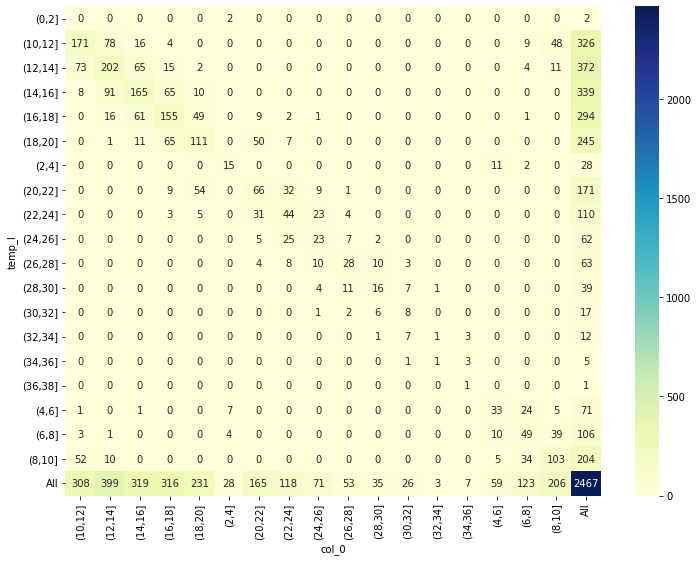

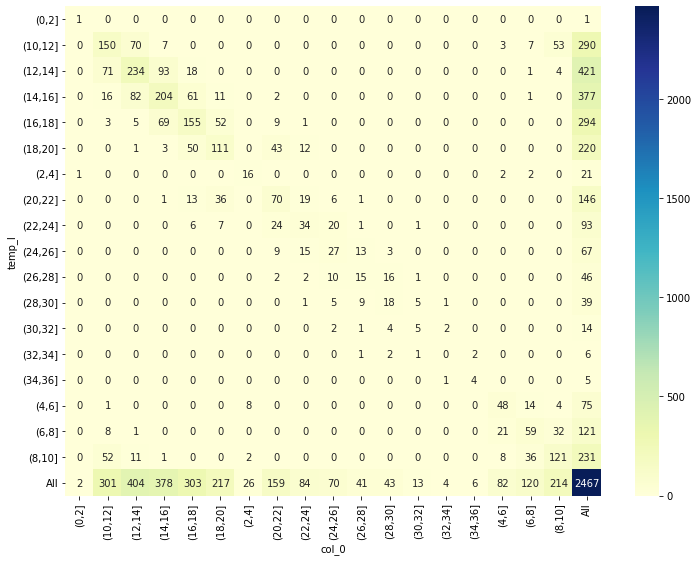

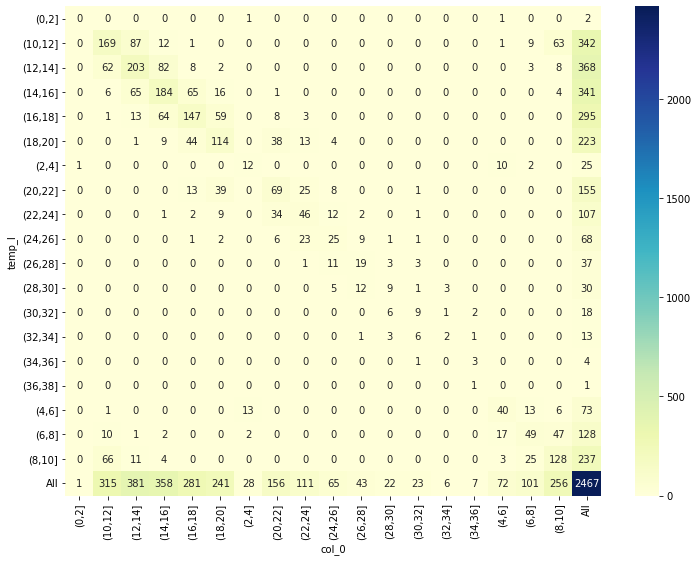

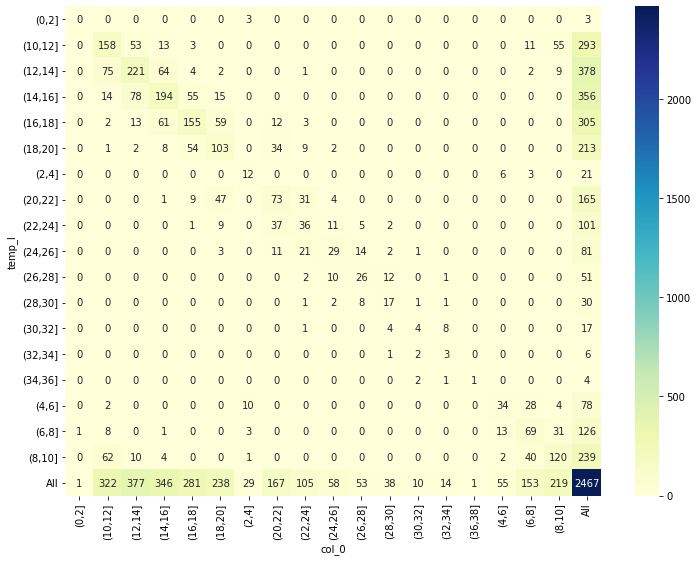

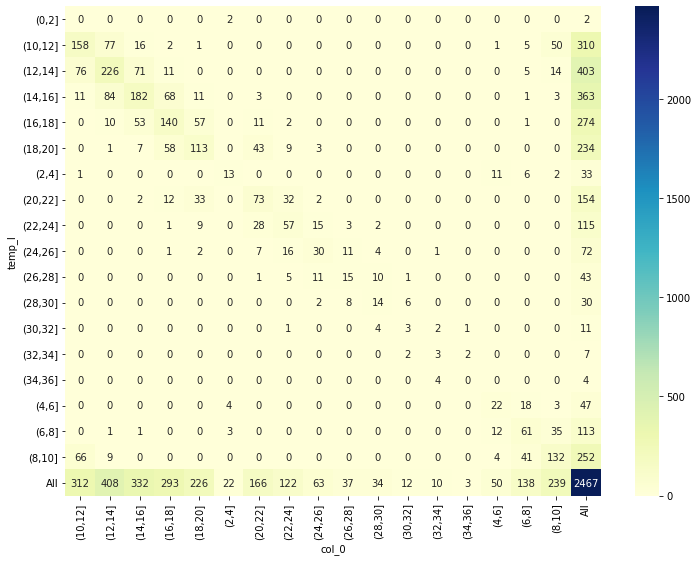

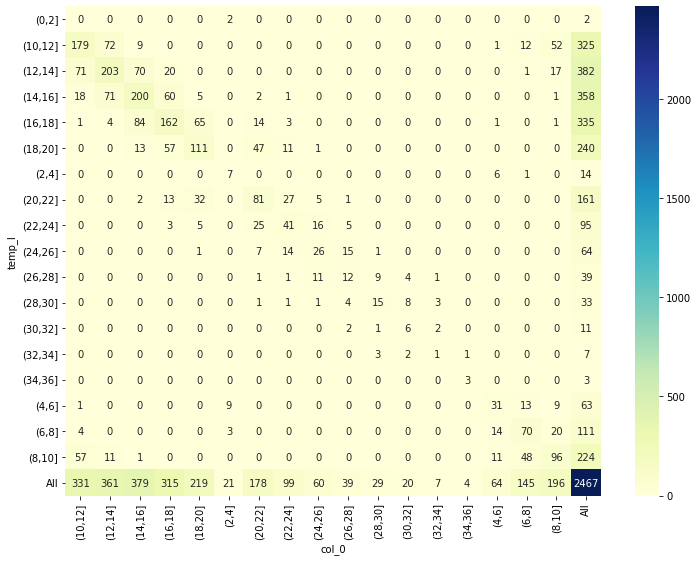

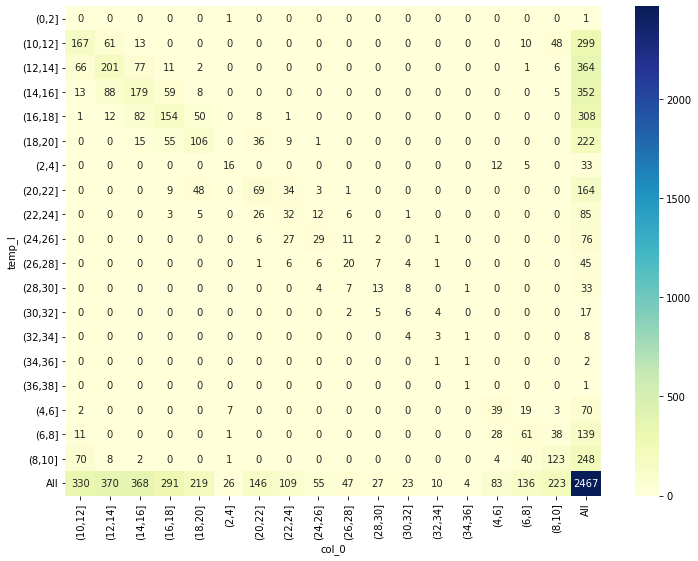

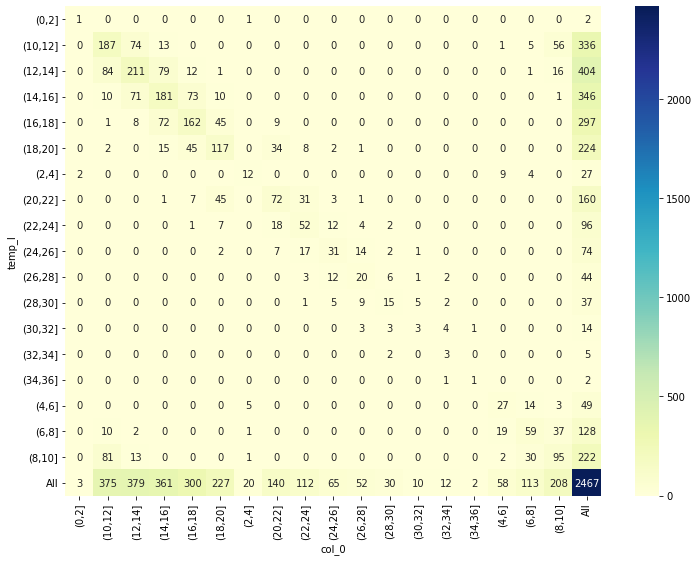

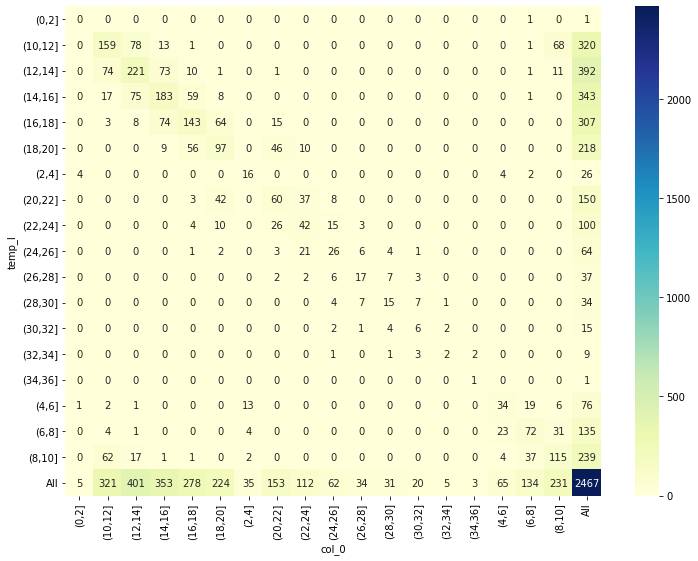

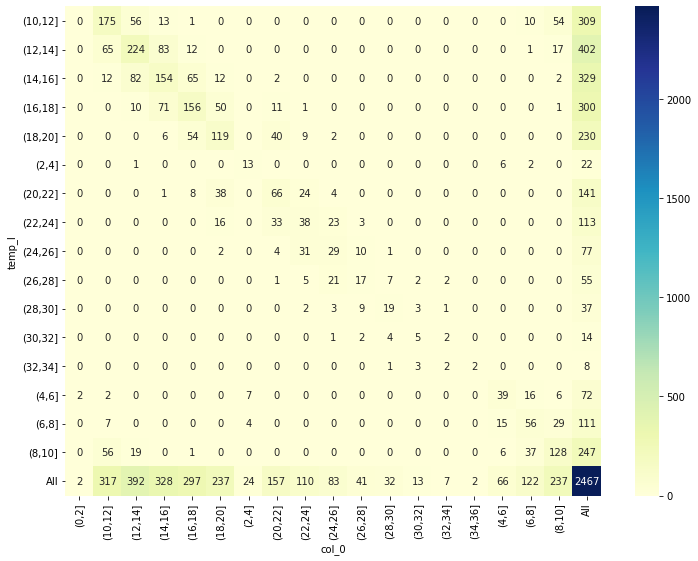

In [28]:
from lightgbm.sklearn import LGBMClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


#select x variables
x_var = model1k.drop(columns=["Unnamed: 0","temp0_l","temp1_l"]).columns.to_list()  

# X and Y
Y = df_all1k.temp_l
X = df_all1k[x_var]

# loop ranadom

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  #X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = tree.DecisionTreeClassifier().fit(X_train,y_train)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)



In [ ]:
tree.plot_tree(ml_model)

In [29]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("temp_LEVX_1km_d0.al", 'wb'))

Pipeline(steps=[('ml_model', DecisionTreeClassifier())])



Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(10,12]        0.717325  0.710843  0.714070   332.000000
(12,14]        0.720513  0.726098  0.723295   387.000000
(14,16]        0.685294  0.701807  0.693452   332.000000
(16,18]        0.631229  0.646259  0.638655   294.000000
(18,20]        0.635193  0.619247  0.627119   239.000000
(2,4]          0.950000  0.760000  0.844444    25.000000
(20,22]        0.553073  0.622642  0.585799   159.000000
(22,24]        0.550000  0.411215  0.470588   107.000000
(24,26]        0.493151  0.562500  0.525547    64.000000
(26,28]        0.536585  0.500000  0.517647    44.000000
(28,30]        0.650000  0.634146  0.641975    41.000000
(30,32]        0.333333  0.500000  0.400000    14.000000
(32,34]        0.000000  0.000000  0.000000     8.000000
(34,36]        0.250000  0.500000  0.333333     2.000000
(36,38]        0.000000  0.000000  0.000000     1.000000
(4,6]          0.721311  0.771930  0.745763    57.000000
(6,8]          0.716667  0.6013

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score     support
(0,2]          0.000000  0.000000  0.000000     1.00000
(10,12]        0.689944  0.750760  0.719068   329.00000
(12,14]        0.713514  0.691099  0.702128   382.00000
(14,16]        0.673973  0.713043  0.692958   345.00000
(16,18]        0.743506  0.689759  0.715625   332.00000
(18,20]        0.613734  0.684211  0.647059   209.00000
(2,4]          0.833333  0.714286  0.769231    28.00000
(20,22]        0.644295  0.571429  0.605678   168.00000
(22,24]        0.582524  0.645161  0.612245    93.00000
(24,26]        0.500000  0.553571  0.525424    56.00000
(26,28]        0.451613  0.350000  0.394366    40.00000
(28,30]        0.485714  0.607143  0.539683    28.00000
(30,32]        0.400000  0.142857  0.210526    14.00000
(32,34]        0.333333  0.333333  0.333333     9.00000
(34,36]        0.333333  0.500000  0.400000     4.00000
(36,38]        0.000000  0.000000  0.000000     1.00000
(4,6]          0.703704  0.655172  0.678571    5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(0,2]          0.000000  0.000000  0.000000     2.000000
(10,12]        0.666667  0.685185  0.675799   324.000000
(12,14]        0.692118  0.729870  0.710493   385.000000
(14,16]        0.708455  0.698276  0.703329   348.000000
(16,18]        0.649351  0.704225  0.675676   284.000000
(18,20]        0.627803  0.595745  0.611354   235.000000
(2,4]          0.787879  0.812500  0.800000    32.000000
(20,22]        0.525000  0.556291  0.540193   151.000000
(22,24]        0.586957  0.486486  0.532020   111.000000
(24,26]        0.522388  0.546875  0.534351    64.000000
(26,28]        0.718750  0.450980  0.554217    51.000000
(28,30]        0.487805  0.800000  0.606061    25.000000
(30,32]        0.466667  0.411765  0.437500    17.000000
(32,34]        0.200000  0.250000  0.222222     4.000000
(34,36]        0.000000  0.000000  0.000000     2.000000
(4,6]          0.734375  0.701493  0.717557    67.000000
(6,8]          0.738318  0.6370

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(0,2]          0.000000  0.000000  0.000000     2.000000
(10,12]        0.715719  0.644578  0.678288   332.000000
(12,14]        0.696970  0.747500  0.721351   400.000000
(14,16]        0.681115  0.656716  0.668693   335.000000
(16,18]        0.640379  0.714789  0.675541   284.000000
(18,20]        0.586957  0.605381  0.596026   223.000000
(2,4]          0.640000  0.666667  0.653061    24.000000
(20,22]        0.569697  0.566265  0.567976   166.000000
(22,24]        0.551020  0.490909  0.519231   110.000000
(24,26]        0.559322  0.485294  0.519685    68.000000
(26,28]        0.478261  0.564103  0.517647    39.000000
(28,30]        0.586207  0.566667  0.576271    30.000000
(30,32]        0.500000  0.333333  0.400000    21.000000
(32,34]        0.222222  0.222222  0.222222     9.000000
(34,36]        0.000000  0.000000  0.000000     0.000000
(4,6]          0.734375  0.643836  0.686131    73.000000
(6,8]          0.612069  0.6068

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(0,2]          0.000000  0.000000  0.000000     2.000000
(10,12]        0.717460  0.697531  0.707355   324.000000
(12,14]        0.699752  0.742105  0.720307   380.000000
(14,16]        0.661808  0.675595  0.668630   336.000000
(16,18]        0.671587  0.614865  0.641975   296.000000
(18,20]        0.650442  0.620253  0.634989   237.000000
(2,4]          0.666667  0.736842  0.700000    19.000000
(20,22]        0.535519  0.604938  0.568116   162.000000
(22,24]        0.486957  0.509091  0.497778   110.000000
(24,26]        0.523810  0.530120  0.526946    83.000000
(26,28]        0.428571  0.367347  0.395604    49.000000
(28,30]        0.689655  0.512821  0.588235    39.000000
(30,32]        0.352941  0.600000  0.444444    10.000000
(32,34]        0.500000  0.500000  0.500000     8.000000
(34,36]        0.333333  0.600000  0.428571     5.000000
(36,38]        0.000000  0.000000  0.000000     2.000000
(4,6]          0.750000  0.6562

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(10,12]        0.627507  0.659639  0.643172   332.000000
(12,14]        0.698376  0.700000  0.699187   430.000000
(14,16]        0.713018  0.719403  0.716196   335.000000
(16,18]        0.689655  0.680272  0.684932   294.000000
(18,20]        0.593750  0.636364  0.614319   209.000000
(2,4]          0.863636  0.904762  0.883721    21.000000
(20,22]        0.513333  0.583333  0.546099   132.000000
(22,24]        0.540816  0.495327  0.517073   107.000000
(24,26]        0.537313  0.473684  0.503497    76.000000
(26,28]        0.422222  0.422222  0.422222    45.000000
(28,30]        0.422222  0.593750  0.493506    32.000000
(30,32]        1.000000  0.173913  0.296296    23.000000
(32,34]        0.250000  0.500000  0.333333     4.000000
(34,36]        0.750000  0.750000  0.750000     4.000000
(36,38]        0.000000  0.000000  0.000000     0.000000
(4,6]          0.836364  0.666667  0.741935    69.000000
(6,8]          0.723404  0.5762

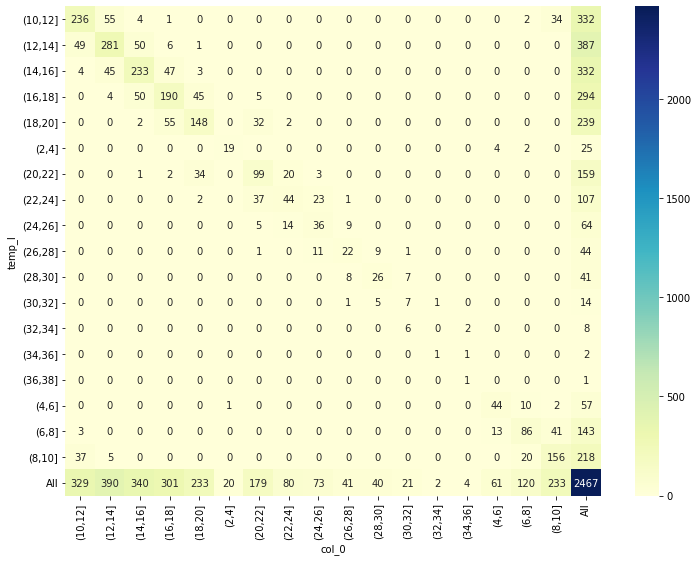

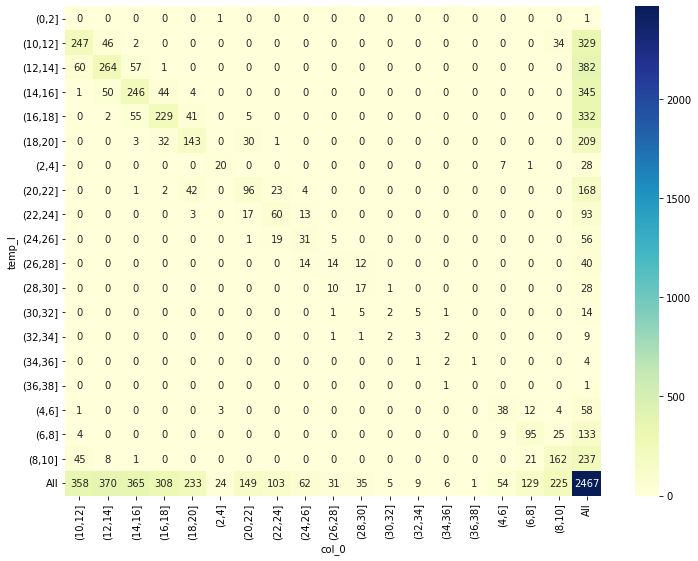

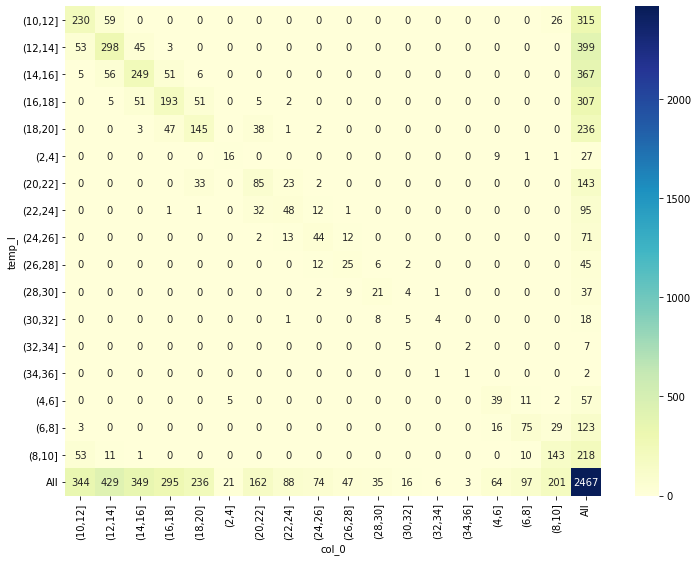

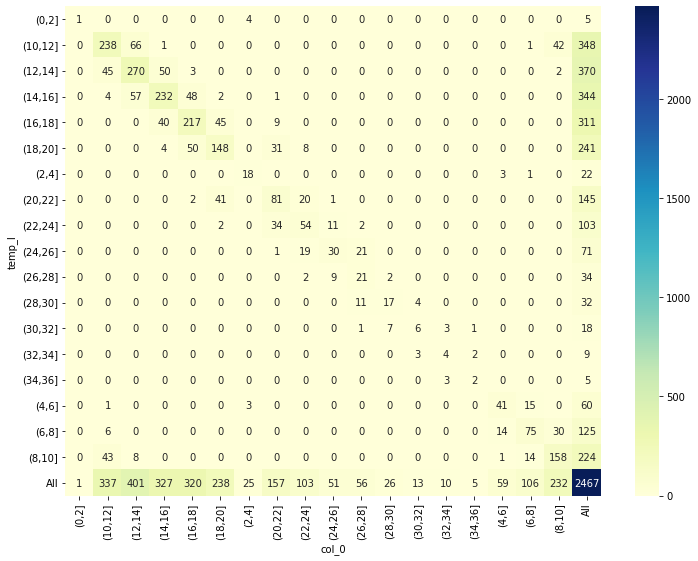

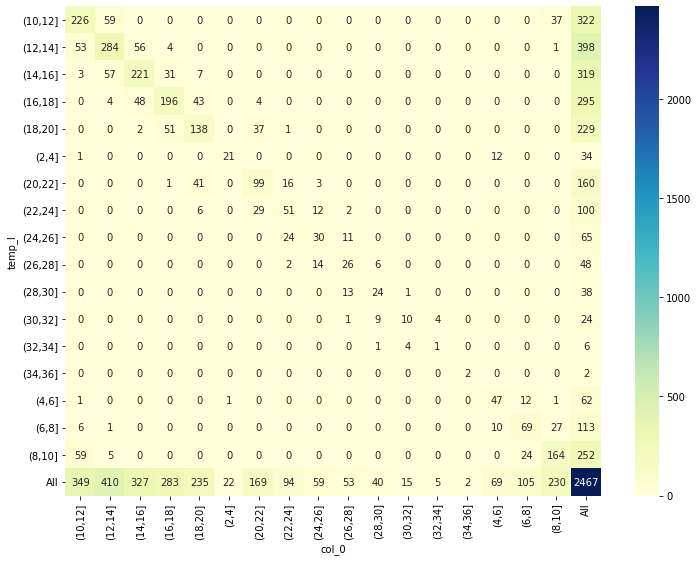

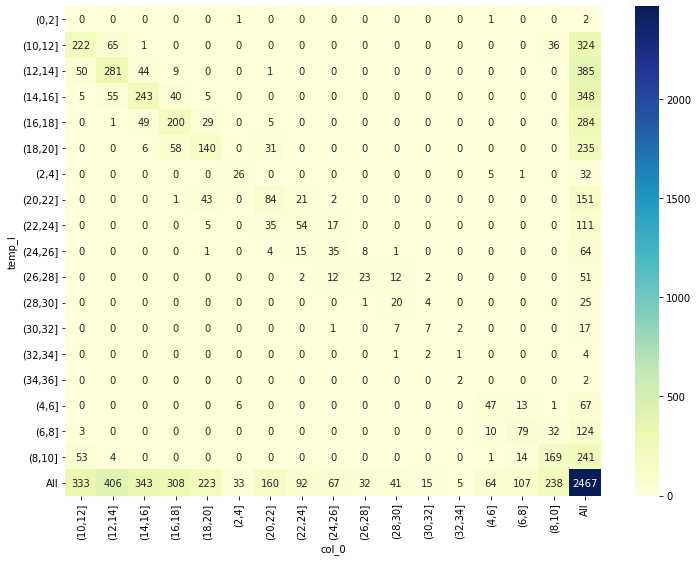

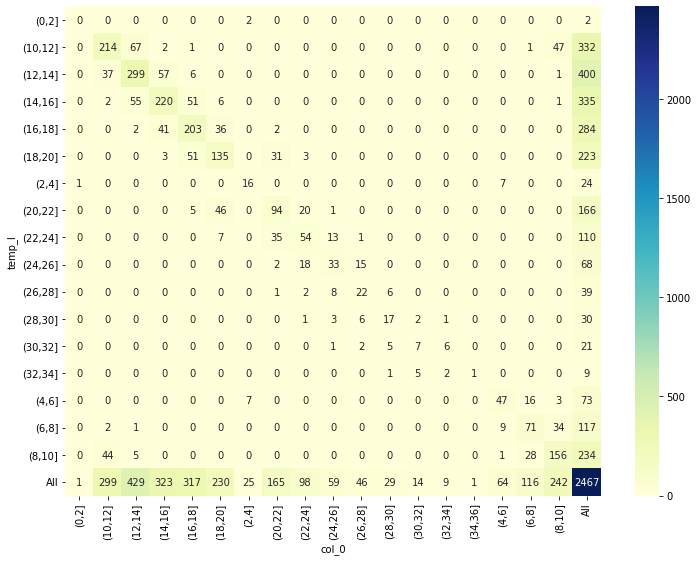

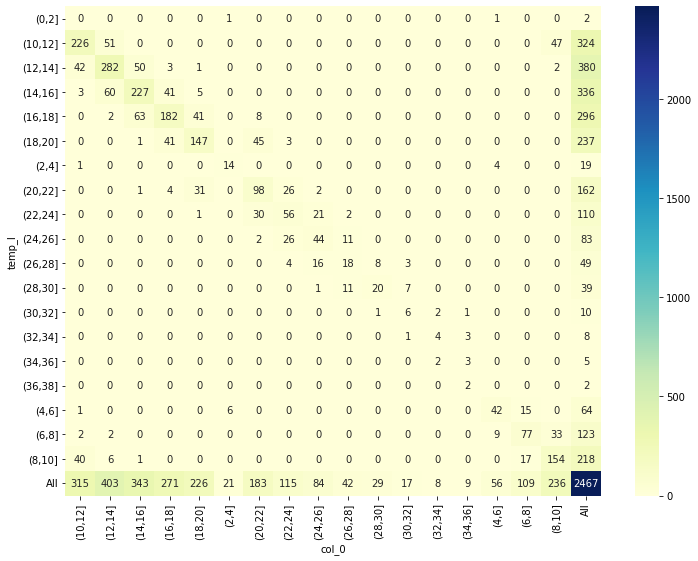

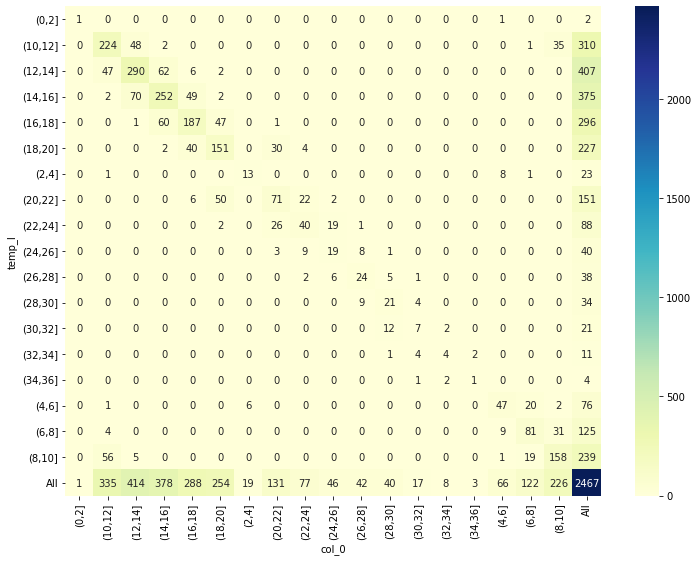

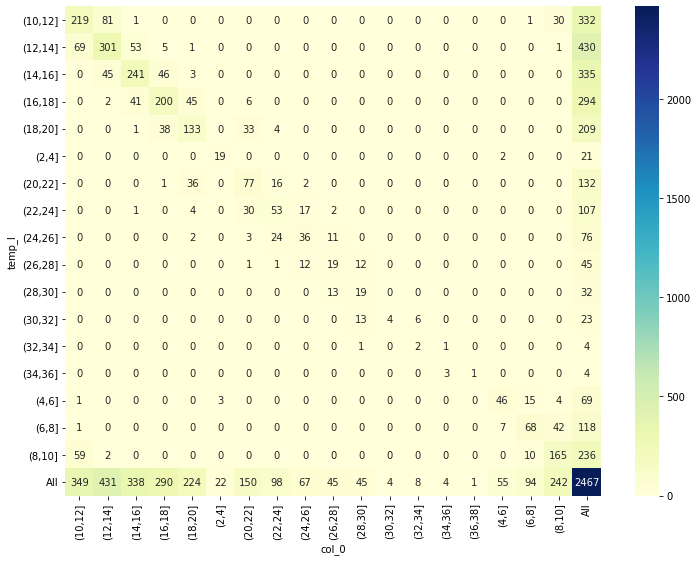

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = model1k.drop(columns=["Unnamed: 0","temp0_l","temp1_l"]).columns.to_list()
# X and Y
Y = df_all1k.temp_l
X = df_all1k[x_var]

# loop ranadom

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  #X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)

  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');
  

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)



In [22]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("temp_LEVX_1km_d0.al", 'wb'))

Pipeline(steps=[('ml_model', ExtraTreesClassifier(n_estimators=150))])
